In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

(200, 2) (200, 1)


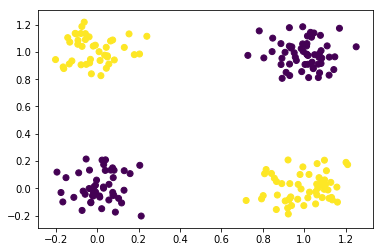

In [48]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 200
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.normal(loc=0., scale=0.1, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [49]:
import mylibrary.nnlib as tnn

In [50]:
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

In [51]:
colors = ['r', 'y', 'g', 'b']

In [52]:
y.shape

(200, 1)

In [53]:
y_logit = tnn.Logits.index_to_logit(y)
y_logit[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [74]:
optimizer = tnn.Adam()
layer11 = tnn.NonLinearLayer(2, 1,activation=tnn.LeakyRelu(), optimizer=optimizer)
layer12 = tnn.NonLinearLayer(1, 2,activation=tnn.Softmax(), optimizer=optimizer)
xor1 = tnn.AutoForm()
xor1.collect_global_layers()

In [75]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = xor1.forward(x)
    loss = tnn.CrossEntropyLoss.loss(a1, y_logit)
    dy = tnn.CrossEntropyLoss.del_loss(a1, y_logit)
    
    dx = xor1.backward(dy)
    
    xor1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        out = tnn.Logits.logit_to_index(a1)

        ax.clear()
#         plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
#         plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))
        
        classxy = xor1.forward(xxyy)
        classxyi = classxyi = tnn.Logits.logit_to_index(classxy)
        plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   alpha=0.5,
                   aspect='auto', origin='lower')
        plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')        

        
        fig.canvas.draw()
        
        print("Weight 1", '\n', xor1.layerList[0].weights)
        print("Biases 1", '\n', xor1.layerList[0].bias)
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.6832585146343138
Weight 1 
 [[-0.52177595]
 [-0.60209863]]
Biases 1 
 [0.00999998]


_______________________
epoch 10
Loss 0.6542696306439482
Weight 1 
 [[-0.58343815]
 [-0.6973639 ]]
Biases 1 
 [0.11073233]


_______________________
epoch 20
Loss 0.6200318991898031
Weight 1 
 [[-0.52579005]
 [-0.71864221]]
Biases 1 
 [0.21292138]


_______________________
epoch 30
Loss 0.5852983646324019
Weight 1 
 [[-0.43182021]
 [-0.6282751 ]]
Biases 1 
 [0.31434538]


_______________________
epoch 40
Loss 0.5628004861458455
Weight 1 
 [[-0.52733372]
 [-0.51047144]]
Biases 1 
 [0.39174391]


_______________________
epoch 50
Loss 0.5538862630781888
Weight 1 
 [[-0.60299947]
 [-0.54191534]]
Biases 1 
 [0.43752115]


_______________________
epoch 60
Loss 0.5466811563318381
Weight 1 
 [[-0.63999802]
 [-0.64168816]]
Biases 1 
 [0.46209944]


_______________________
epoch 70
Loss 0.5420757171646498
Weight 1 
 [[-0.6887724 ]
 [-0.67260521]]
Biases 1 
 [0.48713142]


_

Weight 1 
 [[-0.93772933]
 [-0.8614893 ]]
Biases 1 
 [0.60660122]


_______________________
epoch 670
Loss 0.5277964109735928
Weight 1 
 [[-0.93693003]
 [-0.8645835 ]]
Biases 1 
 [0.60606283]


_______________________
epoch 680
Loss 0.5277800888299476
Weight 1 
 [[-0.93765995]
 [-0.86182339]]
Biases 1 
 [0.60654432]


_______________________
epoch 690
Loss 0.527783007325451
Weight 1 
 [[-0.93748553]
 [-0.86244845]]
Biases 1 
 [0.60644416]


_______________________
epoch 700
Loss 0.5277854583738502
Weight 1 
 [[-0.93741315]
 [-0.86279399]]
Biases 1 
 [0.60637707]


_______________________
epoch 710
Loss 0.5277740467892356
Weight 1 
 [[-0.93774209]
 [-0.8615308 ]]
Biases 1 
 [0.60661059]


_______________________
epoch 720
Loss 0.52779314541447
Weight 1 
 [[-0.93705407]
 [-0.86419082]]
Biases 1 
 [0.60613954]


_______________________
epoch 730
Loss 0.527777334352607
Weight 1 
 [[-0.9377997 ]
 [-0.86136641]]
Biases 1 
 [0.60661041]


_______________________
epoch 740
Loss 0.5277840278705

TclError: invalid command name "pyimage284"

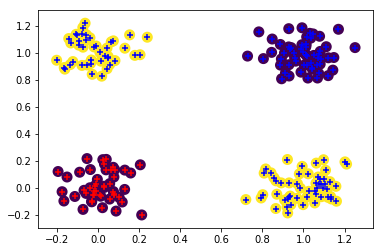

In [76]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

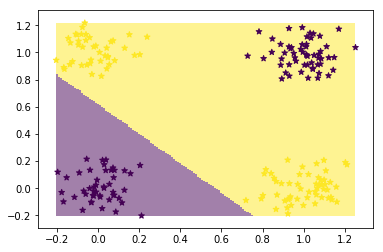

In [77]:
# advanced way of showing
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=matplotlib.colors.ListedColormap(colors[2:]),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')

### gradient predicting

In [78]:
dy[:5]

array([[-0.04036898,  0.04036898],
       [ 0.37778415, -0.37778415],
       [ 0.37954064, -0.37954064],
       [ 0.38242029, -0.38242029],
       [-0.63879662,  0.63879662]])

In [79]:
((dy+1)/2).max()

0.8193983112601946

In [80]:
dy.min(axis=0), dy.max(axis=0)

(array([-0.63879662, -0.39618432]), array([0.39618432, 0.63879662]))

In [81]:
scaled = (dy+1)/2

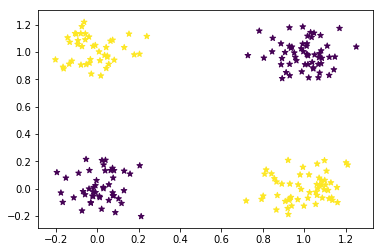

In [82]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')

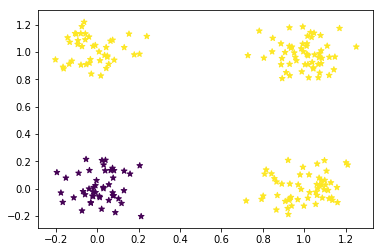

In [83]:
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='*')

In [84]:
dys = {0:(dy, scaled)}
a1s = {0:a1}
outs = {0:out}

In [88]:
optimizer = tnn.Adam(learning_rate=0.01)
layer21 = tnn.NonLinearLayer(2, 1,activation=tnn.LeakyRelu(), optimizer=optimizer)
layer22 = tnn.NonLinearLayer(1, 2,activation=tnn.Softmax(), optimizer=optimizer)
xor2 = tnn.AutoForm()
xor2.collect_global_layers()

In [89]:
xor2.layerList

In [90]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = xor2.forward(x)
    loss = tnn.CrossEntropyLoss.loss(a1, dys[0][1])
    dy = tnn.CrossEntropyLoss.del_loss(a1, dys[0][1])
    
    xor2.backward(dy)
    
    xor2.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        
        out = tnn.Logits.logit_to_index(-(a1*2 - 1) + a1s[0])

        ax.clear()
        
#         plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
#         plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))
        
        classxy = -(xor2.forward(xxyy)*2-1) + xor1.forward(xxyy)
        classxyi = classxyi = tnn.Logits.logit_to_index(classxy)
        plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   alpha=0.5,
                   aspect='auto', origin='lower')
        plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')        
        
        
        fig.canvas.draw()
        
#         print("Weight 1", '\n', logistic1.weights)
#         print("Biases 1", '\n', logistic1.bias)
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

_______________________
epoch 0
Loss 0.772331271825796


_______________________
epoch 10
Loss 0.6894725841126303


_______________________
epoch 20
Loss 0.6729977797948288


_______________________
epoch 30
Loss 0.668300980129646


_______________________
epoch 40
Loss 0.6615699681818404


_______________________
epoch 50
Loss 0.6566862519937535


_______________________
epoch 60
Loss 0.6520306855237554


_______________________
epoch 70
Loss 0.6473251391525524


_______________________
epoch 80
Loss 0.6424507324182965


_______________________
epoch 90
Loss 0.6377076283045213


_______________________
epoch 100
Loss 0.633474936542562


_______________________
epoch 110
Loss 0.6297986470904094


_______________________
epoch 120
Loss 0.626600736604849


_______________________
epoch 130
Loss 0.6239749177760594


_______________________
epoch 140
Loss 0.6218622057194888


_______________________
epoch 150
Loss 0.6202061741903555


_______________________
epoch 160
Loss 0.61896240402921

TclError: invalid command name "pyimage328"

In [91]:
scaled_rev = (a1*2 -1)
scaled_rev

array([[ 0.24302494, -0.24302494],
       [ 0.23019825, -0.23019825],
       [ 0.22947431, -0.22947431],
       [ 0.23437654, -0.23437654],
       [-0.85250354,  0.85250354],
       [ 0.22798381, -0.22798381],
       [ 0.24433827, -0.24433827],
       [-0.36765596,  0.36765596],
       [ 0.23990886, -0.23990886],
       [ 0.23111503, -0.23111503],
       [-0.61675327,  0.61675327],
       [ 0.22908325, -0.22908325],
       [-0.42331053,  0.42331053],
       [-0.78203095,  0.78203095],
       [-0.655612  ,  0.655612  ],
       [ 0.24382977, -0.24382977],
       [ 0.23076711, -0.23076711],
       [ 0.2275775 , -0.2275775 ],
       [ 0.23217436, -0.23217436],
       [ 0.23995806, -0.23995806],
       [ 0.24339759, -0.24339759],
       [-0.67695946,  0.67695946],
       [-0.62278866,  0.62278866],
       [ 0.24676336, -0.24676336],
       [-0.71291916,  0.71291916],
       [-0.57693448,  0.57693448],
       [ 0.2325299 , -0.2325299 ],
       [ 0.23279882, -0.23279882],
       [ 0.22997625,

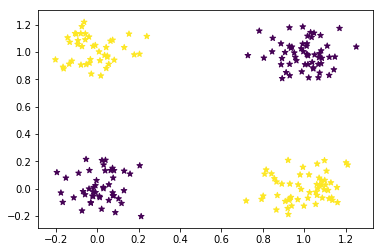

In [92]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='*')

In [93]:
new_out = tnn.Logits.logit_to_index(-scaled_rev + a1s[0])
new_out

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0])

In [94]:
y.reshape(-1)

array([0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.])

In [95]:
outs[0] - new_out

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1])

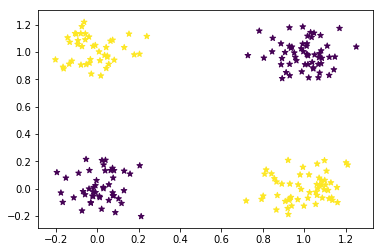

In [96]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=new_out.reshape(-1), marker='*')

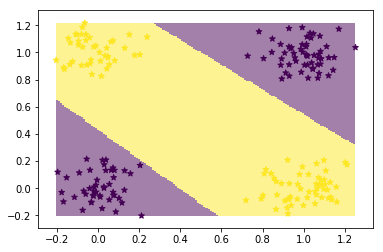

In [97]:
classxy = xor1.forward(xxyy) - (xor2.forward(xxyy)*2 -1)
classxyi = tnn.Logits.logit_to_index(classxy)
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')